In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
trnsc=pd.read_excel("QVI_transaction_data.xlsx")
trnsc.info()
# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [60]:
trnsc.describe()
# No anamolies

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


#### "PROD_NBR" == "PROD_NAME"
#### Convert the Date column into Date type Variable
#### Do some modifications on "PROD_NAME"
#### seperate package size from the name
#### seperate company from the "PROD_NAME"
#### why is "TOT_SALES"  column in decimal?? is it representing % then why is the max value 650

In [61]:
transc=trnsc.copy()
import re
packages=transc["PROD_NAME"].apply(lambda x:x.split()[-1])
packages

0         SeaSalt175g
1                175g
2                170g
3                175g
4                150g
             ...     
264831           175g
264832           175g
264833           170g
264834           150g
264835           175g
Name: PROD_NAME, Length: 264836, dtype: object

In [62]:
packages=np.where(packages=='Salt',"135g",packages)
packages=pd.Series(packages)
packages.unique()

array(['SeaSalt175g', '175g', '170g', '150g', '300g', '330g', '210g',
       '210G', '270g', '220g', '125g', '110g', '134g', '150G',
       'Chli&S/Cream175G', 'Chckn175g', '380g', 'Chicken270g', '180g',
       '165g', '135g', '250g', 'Ht300g', 'Chs&Onion170g', '200g', '160g',
       'CutSalt/Vinegr175g', '190g', '90g', '70g'], dtype=object)

#### SeaSalt175g
#### Chli&S/Cream175G
#### Chckn175g
#### Chicken270g
#### Chs&Onion170g
#### Ht300g
#### CutSalt/Vinegr175g

In [63]:
packages=packages.apply(lambda x:x[-4:].split('g')[0])
# adding new colum to "transc"
transc["Pkg_size_grm"]=packages

# Removing the numbers from the names of chips
transc["PROD_NAME"]=transc["PROD_NAME"].apply(lambda x:x[:-4])
transc["PROD_NAME"]=np.where(transc["PROD_NAME"]=='Kettle 135g Swt Pot Sea ','Kettle Swt Pot Sea Salt',transc["PROD_NAME"])

#Converting into Lower case letters
transc["PROD_NAME"]=transc["PROD_NAME"].apply(lambda x:x.lower())

# Coverting the DATE column to the desired format
date_offsets = transc["DATE"]
base_date = pd.Timestamp('1899-12-30')  # check this!
dates = pd.Series([
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
])
transc["DATE"]=dates

In [64]:
transc["Pkg_size_grm"].unique()

array(['175', '170', '150', '300', '330', '210', '210G', '270', '220',
       '125', '110', '134', '150G', '175G', '380', '180', '165', '135',
       '250', '200', '160', '190', '90', '70'], dtype=object)

In [65]:
def cleaning(a):
    if len(a)>3:
        return a[:-1]
    else:
        return a
    
transc["Pkg_size_grm"]=transc["Pkg_size_grm"].apply(cleaning)

In [66]:
transc["Pkg_size_grm"]

0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: Pkg_size_grm, Length: 264836, dtype: object

In [67]:
convert_dict={"Pkg_size_grm":int}
transc=transc.astype(convert_dict)
transc.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Pkg_size_grm
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200,182.427004
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226,64.327196
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000,150.000000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000,170.000000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000,175.000000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


In [68]:
# The MAX of "PROD_QTY" is 200!
# Let us examine this outlier
transc[transc["PROD_QTY"]==200]

# The same customer bought 200 chips twice for the same kind of chips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


In [69]:
# lets see if this customer has any other transactions
transc[transc["LYLTY_CARD_NBR"]==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm
69762,2018-08-19,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,2019-05-20,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


It looks like this customer has only had the two transactions over the year and is
not an ordinary retail customer. The customer might be buying chips for commercial
purposes instead. We'll remove this loyalty card number from further analysis.

In [70]:
transc.drop(index=list(transc[transc["LYLTY_CARD_NBR"]==226000].index),inplace=True)
transc.shape

(264834, 9)

In [71]:
transc["salsa_y_n"]=pd.Series(transc["PROD_NAME"].apply(lambda x: 'salsa' in x))
transc

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,salsa_y_n
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,False
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,False
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,False
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,False
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,False
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175,False
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,175,False
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,170,False
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150,False


In [72]:
transc[transc["salsa_y_n"]==True]["PROD_NAME"]
# these are not chips
# so we will be deleting them

5         old el paso salsa   dip tomato mild 
25        old el paso salsa   dip tomato mild 
32        red rock deli sr    salsa & mzzrlla 
44           smiths crinkle cut  tomato salsa 
63                 doritos salsa       medium 
                          ...                 
264675     old el paso salsa   dip tomato med 
264678              woolworths mild     salsa 
264719       smiths crinkle cut  tomato salsa 
264734                    doritos salsa mild  
264780    red rock deli sr    salsa & mzzrlla 
Name: PROD_NAME, Length: 18094, dtype: object

In [82]:
pd.DataFrame(transc[transc["salsa_y_n"]==True]["PROD_NAME"].apply(lambda x: 'old' in x)==True)['PROD_NAME'].value_counts()

True     9324
False    8770
Name: PROD_NAME, dtype: int64

All of the products belonging to the 'old el paso' brand are not Chips but Salsa.

In [83]:
transc.drop(index=list(transc[transc["salsa_y_n"]==True].index),inplace=True)
transc.drop(columns="salsa_y_n",inplace=True)
transc

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,175
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,170
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150


In [84]:
transc[transc["TXN_ID"]==230356]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm
79055,2018-12-07,229,229001,230356,55,snbts whlgrn crisps cheddr&mstrd,2,3.4,90
79056,2018-12-07,229,229001,230356,20,doritos cheese supreme,2,11.4,330
79057,2018-12-07,229,229001,230356,86,cheetos puffs,2,5.6,165


"TXN_ID" column need not be unique

In [85]:
time_series=pd.DataFrame(transc["DATE"].value_counts())
time_series.reset_index(inplace=True)
time_series.columns=["DATE","No_of_TRANSC"]
time_series.sort_values(by=["DATE"],ascending=True,inplace=True)
time_series

,DATE,No_of_TRANSC
252,2018-07-01,663
302,2018-07-02,650
177,2018-07-03,674
214,2018-07-04,669
266,2018-07-05,660
...,...,...
280,2019-06-26,657
211,2019-06-27,669
185,2019-06-28,673
56,2019-06-29,703


There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

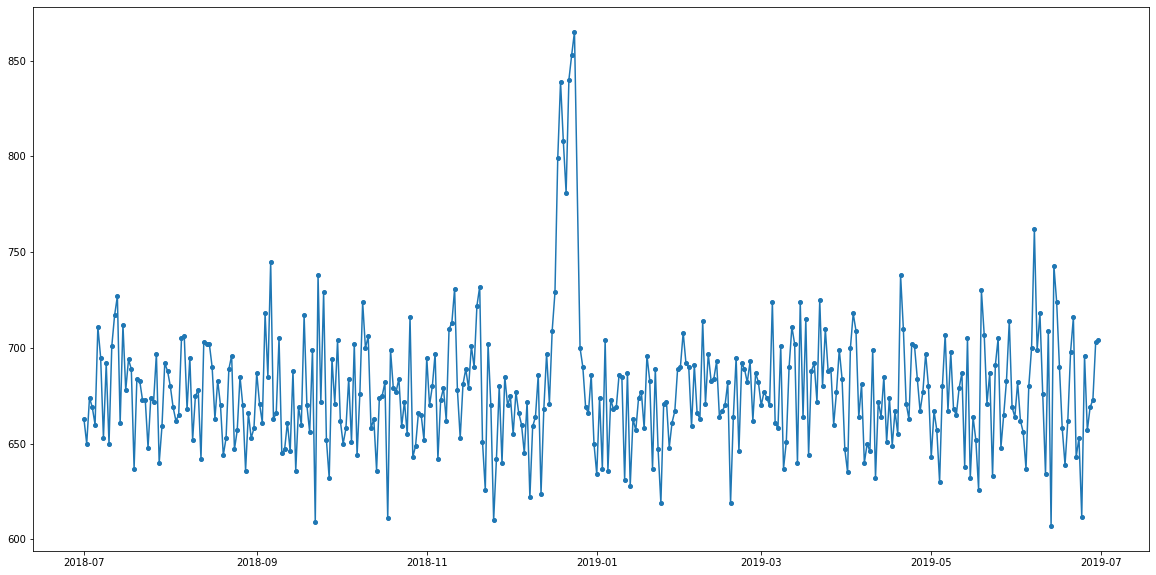

In [86]:
'''
sns.barplot(x="DATE",y="No_of_TRANSC",data=time_series)
plt.xticks(rotation=90)
'''
plt.figure(figsize=(20,10))
plt.plot('DATE','No_of_TRANSC',data=time_series,marker='o',markersize=4)

In [87]:
# zoom in to december and Visualize
filtered_transc=transc.loc[(transc['DATE']>='2018-12-01')&(transc['DATE']<='2018-12-31')]
filtered_transc=pd.DataFrame(filtered_transc["DATE"].value_counts())
filtered_transc.reset_index(inplace=True)
filtered_transc.columns=["DATE","No_of_TRANSC"]
filtered_transc.sort_values(by=["DATE"],ascending=True,inplace=True)
filtered_transc

,DATE,No_of_TRANSC
15,2018-12-01,675
25,2018-12-02,655
14,2018-12-03,677
21,2018-12-04,666
23,2018-12-05,660
27,2018-12-06,645
16,2018-12-07,672
29,2018-12-08,622
24,2018-12-09,659
22,2018-12-10,664


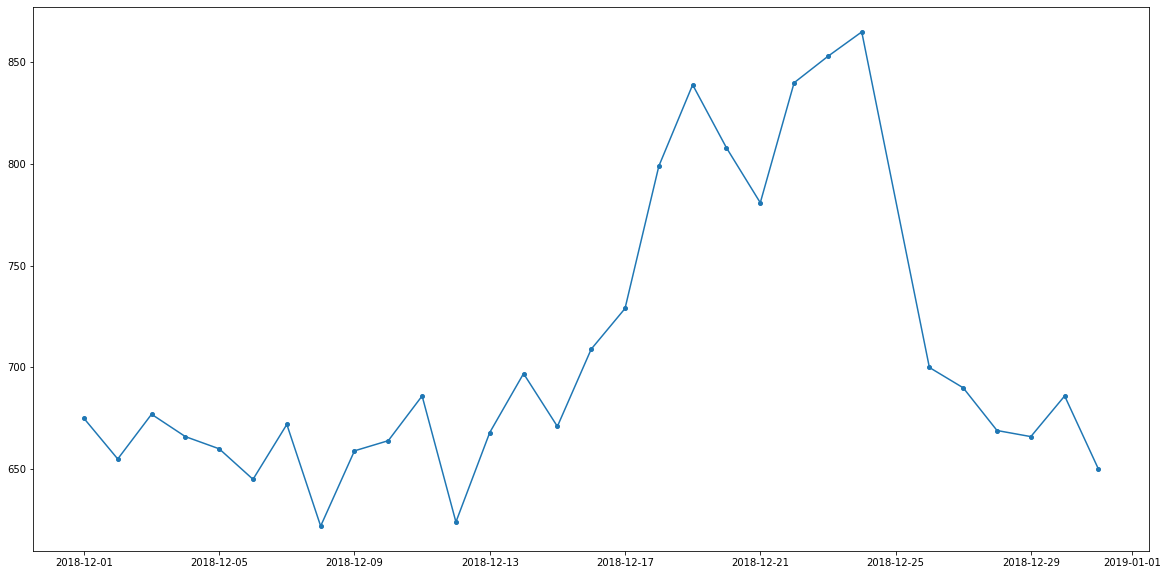

In [88]:
plt.figure(figsize=(20,10))
plt.plot('DATE','No_of_TRANSC',data=filtered_transc,marker='o',markersize=4)

The no.of transactions per day see a spike in the days leading to christmas...and during the day of christmas the shops are closed so the transactions are 0..and the spike decreases after the christmas. 

(array([  4515.,  23841.,  71532., 106133.,  12309.,   3169.,   6285.,
             0.,  12540.,   6416.]),
 array([ 70., 101., 132., 163., 194., 225., 256., 287., 318., 349., 380.]),
 <a list of 10 Patch objects>)

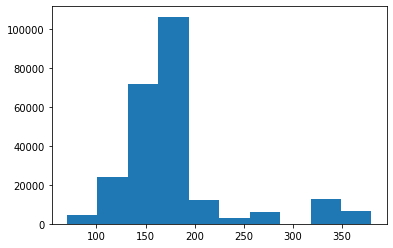

In [89]:
# Pkg_size_grm is a Categorical variable actually encoded in numbers
plt.hist(transc['Pkg_size_grm'])

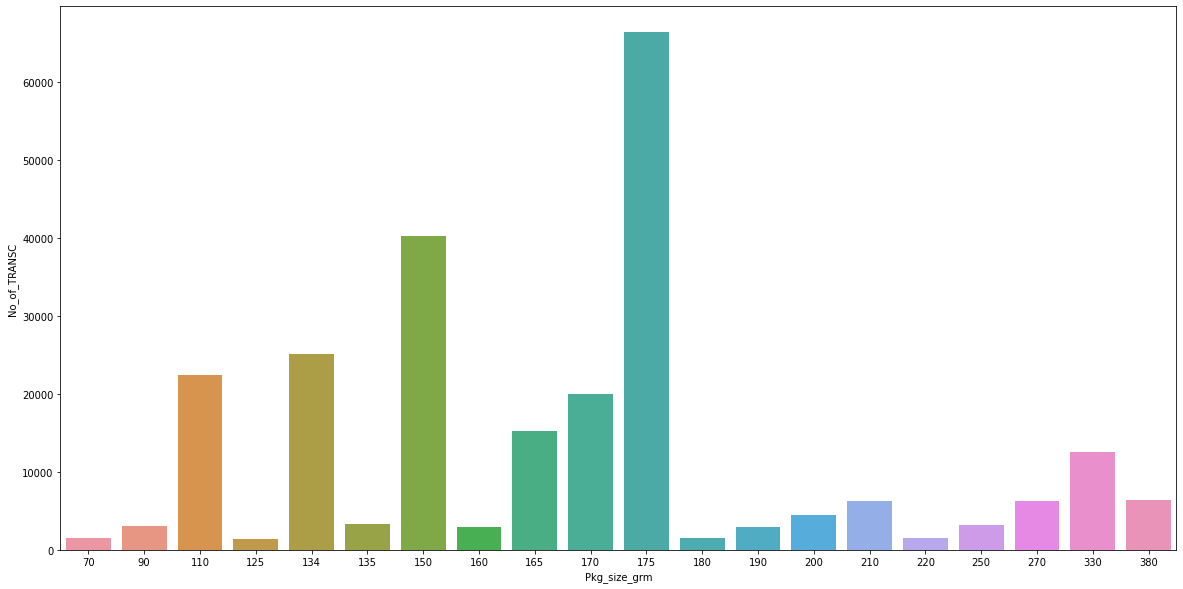

In [90]:
package_freq=pd.DataFrame(transc["Pkg_size_grm"].value_counts())
package_freq.reset_index(inplace=True)
package_freq.columns=["Pkg_size_grm","No_of_TRANSC"]
package_freq.sort_values(by=["Pkg_size_grm"],ascending=True,inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x="Pkg_size_grm",y="No_of_TRANSC",data=package_freq)

In [91]:
# Extracting Brand Names
transc["BRAND"]=pd.Series(transc["PROD_NAME"].apply(lambda x:x.split()[0]))
transc

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,natural
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,ccs
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,smiths
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,smiths
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175,kettle
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,175,tostitos
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,170,doritos
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150,doritos


#### transc["BRAND"].unique()
#### infuzions , infzns
#### smith , smiths
#### sunbites , snbts , grnwves , grain
#### red , rrd
#### natural , ncc
#### ww , woolworths
#### old --> old el paso
#### dorito , doritos
#### burger --> burger rings
#### french --> french fries

In [92]:
transc["BRAND"].replace(to_replace=["infzns","smith","snbts","grnwves","grain","rrd","ncc","ww","old","dorito","burger","french"],value=["infuzions","smiths","sunbites","sunbites","sunbites","red","natural","woolworths","old el paso","doritos","burger rings","french fries"],inplace=True)
transc["BRAND"].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'sunbites', 'doritos',
       'twisties', 'woolworths', 'thins', 'burger rings', 'cheezels',
       'infuzions', 'red', 'pringles', 'tyrrells', 'cobs', 'french fries',
       'tostitos', 'cheetos'], dtype=object)

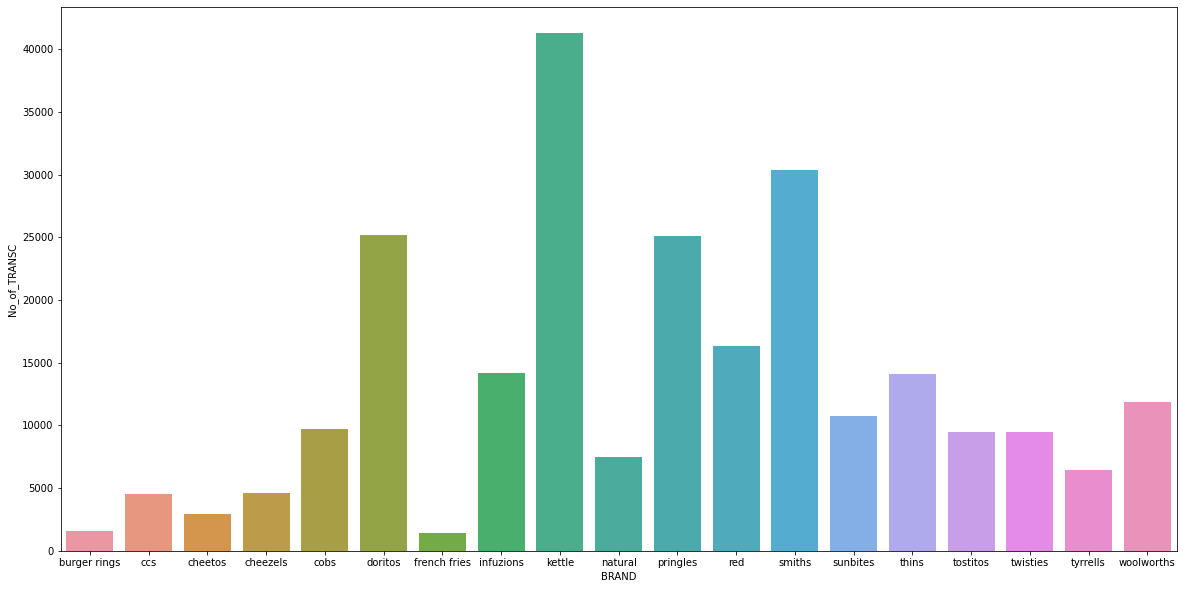

In [93]:
brand_freq=pd.DataFrame(transc["BRAND"].value_counts())
brand_freq.reset_index(inplace=True)
brand_freq.columns=["BRAND","No_of_TRANSC"]
brand_freq.sort_values(by=["BRAND"],ascending=True,inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(x="BRAND",y="No_of_TRANSC",data=brand_freq)

In [94]:
transc['BRAND'].unique()

array(['natural', 'ccs', 'smiths', 'kettle', 'sunbites', 'doritos',
       'twisties', 'woolworths', 'thins', 'burger rings', 'cheezels',
       'infuzions', 'red', 'pringles', 'tyrrells', 'cobs', 'french fries',
       'tostitos', 'cheetos'], dtype=object)

In [95]:
# Analyzing Customer data
cust=pd.read_csv("QVI_purchase_behaviour.csv")
cust.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [96]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
LYLTY_CARD_NBR      72637 non-null int64
LIFESTAGE           72637 non-null object
PREMIUM_CUSTOMER    72637 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [117]:
cust["LYLTY_CARD_NBR"].nunique()

72637

In [98]:
cust.shape

(72637, 3)

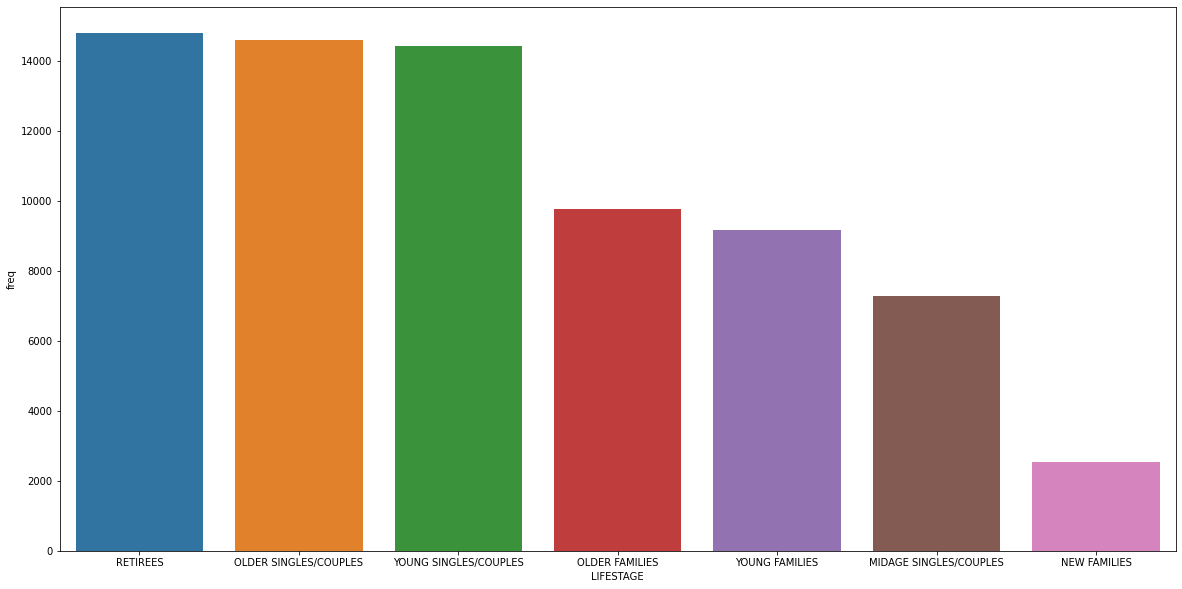

In [99]:
# there seems to be no missing data or descrepencies in the Dataset
lifestage_freq=pd.DataFrame(cust["LIFESTAGE"].value_counts())
lifestage_freq.reset_index(inplace=True)
lifestage_freq.columns=["LIFESTAGE","freq"]

plt.figure(figsize=(20,10))
sns.barplot(x="LIFESTAGE",y="freq",data=lifestage_freq)

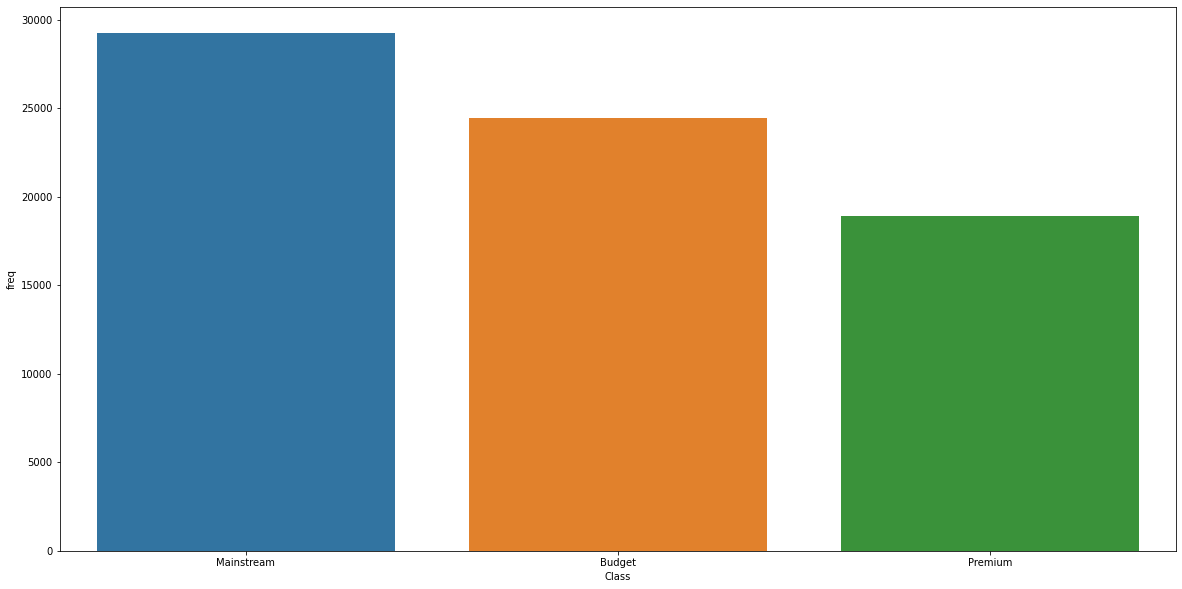

In [100]:
class_cust_freq=pd.DataFrame(cust["PREMIUM_CUSTOMER"].value_counts())
class_cust_freq.reset_index(inplace=True)
class_cust_freq.columns=["Class","freq"]

plt.figure(figsize=(20,10))
sns.barplot(x="Class",y="freq",data=class_cust_freq)

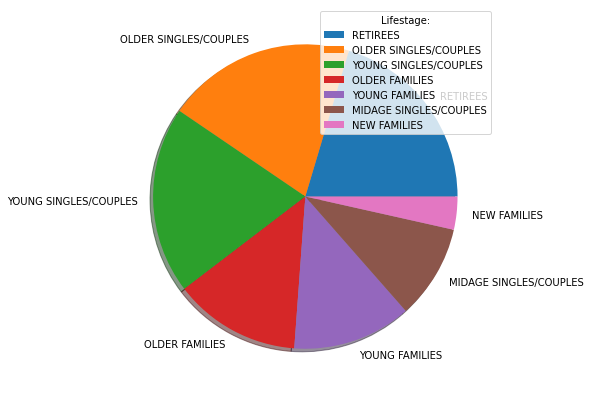

In [101]:
lifesize_freq=pd.DataFrame(cust["LIFESTAGE"].value_counts())
lifesize_freq.columns=["Freq"]

plt.figure(figsize=(7,7))
plt.pie(lifesize_freq["Freq"],labels=lifesize_freq.index,shadow=True)
plt.legend(title="Lifestage:")

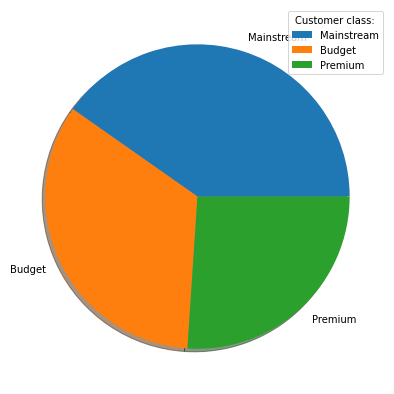

In [102]:
cust_class=pd.DataFrame(cust["PREMIUM_CUSTOMER"].value_counts())
cust_class.columns=["Freq"]

plt.figure(figsize=(7,7))
plt.pie(cust_class["Freq"],labels=cust_class.index,shadow=True)
plt.legend(title="Customer class:")

Text(0, 0.5, 'count')

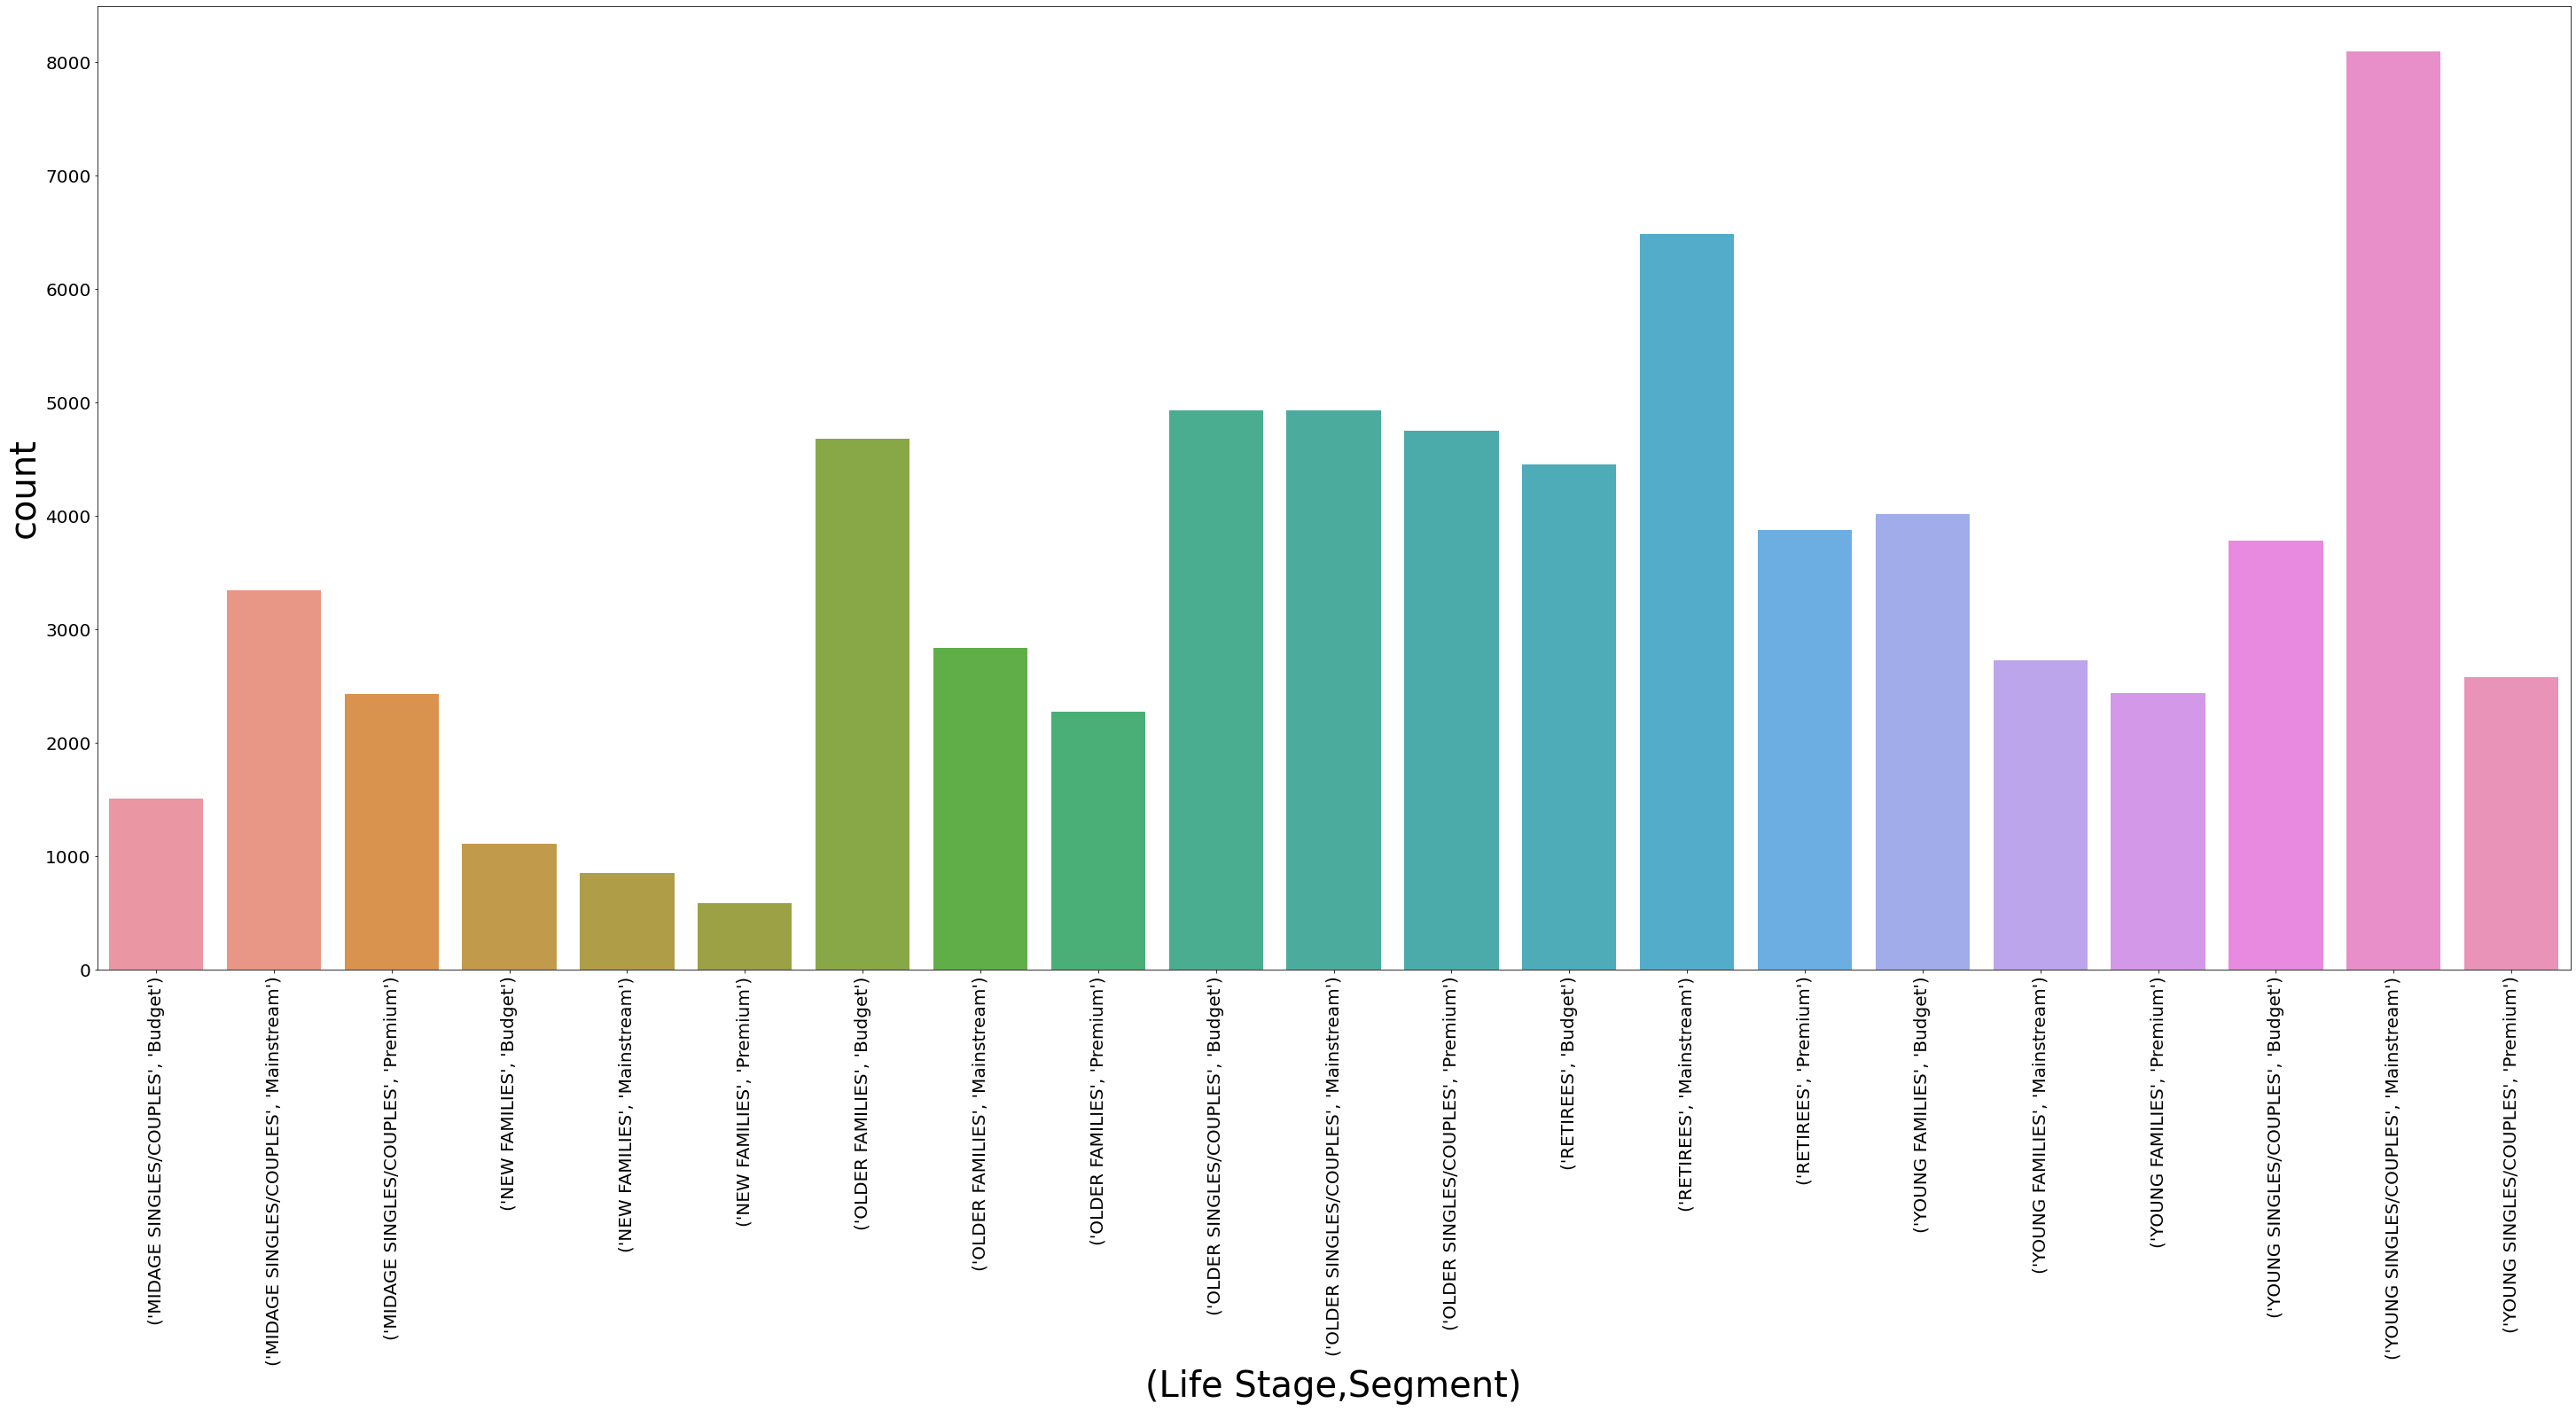

In [103]:
# For each class of Lifesize how many classes of customers are there? like premium,mainstream,budget...
cust["count"]=1
comb1=cust[["LIFESTAGE","PREMIUM_CUSTOMER","count"]].pivot_table(index=["LIFESTAGE","PREMIUM_CUSTOMER"],aggfunc=sum)

fig,ax=plt.subplots(figsize=(50,20))
sns.barplot(x=comb1.index,y=comb1["count"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("(Life Stage,Segment)",fontsize=40)
ax.set_ylabel("count",fontsize=40)

### Joining the 2 dataframes

In [104]:
transc

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,natural
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,ccs
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,smiths
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,smiths
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175,kettle
264832,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,175,tostitos
264833,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,170,doritos
264834,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150,doritos


In [105]:
cust.drop(columns=["count"],inplace=True)
cust

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [106]:
data=pd.merge(transc,cust,on="LYLTY_CARD_NBR",how="left")
data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175,kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,tostitos splash of lime,1,4.4,175,tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,doritos mexicana,2,8.8,170,doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150,doritos,YOUNG SINGLES/COUPLES,Premium


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 12 columns):
DATE                246740 non-null datetime64[ns]
STORE_NBR           246740 non-null int64
LYLTY_CARD_NBR      246740 non-null int64
TXN_ID              246740 non-null int64
PROD_NBR            246740 non-null int64
PROD_NAME           246740 non-null object
PROD_QTY            246740 non-null int64
TOT_SALES           246740 non-null float64
Pkg_size_grm        246740 non-null int32
BRAND               246740 non-null object
LIFESTAGE           246740 non-null object
PREMIUM_CUSTOMER    246740 non-null object
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(4)
memory usage: 23.5+ MB


In [108]:
data.to_csv("Merged_Data.csv")

In [109]:
data[data["LYLTY_CARD_NBR"]==230078]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
30590,2019-05-17,230,230078,232430,68,pringles chicken salt crips,4,14.8,134,pringles,OLDER FAMILIES,Budget
48810,2018-07-18,230,230078,232416,7,smiths crinkle original,2,11.4,330,smiths,OLDER FAMILIES,Budget
48811,2018-07-31,230,230078,232417,85,rrd honey soy chicken,2,6.0,165,red,OLDER FAMILIES,Budget
48812,2018-09-26,230,230078,232418,90,tostitos smoked chipotle,2,8.8,175,tostitos,OLDER FAMILIES,Budget
48813,2018-09-29,230,230078,232419,1,smiths crinkle cut chips barbecue,2,5.8,170,smiths,OLDER FAMILIES,Budget
48814,2018-10-25,230,230078,232420,2,cobs popd sour crm &chives chips,2,7.6,110,cobs,OLDER FAMILIES,Budget
48815,2018-10-29,230,230078,232421,87,infuzions bbq rib prawn crackers,2,7.6,110,infuzions,OLDER FAMILIES,Budget
48816,2018-11-18,230,230078,232422,79,smiths chip thinly cutsalt/vinegr,2,6.0,175,smiths,OLDER FAMILIES,Budget
48817,2018-12-23,230,230078,232424,17,kettle sensations bbq&maple,2,9.2,150,kettle,OLDER FAMILIES,Budget
48818,2019-01-09,230,230078,232425,63,kettle swt pot sea salt,2,8.4,135,kettle,OLDER FAMILIES,Budget


#### TOT_SALES --> Expenditure

## Data Analysis

In [110]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,kettle,MIDAGE SINGLES/COUPLES,Budget


In [115]:
data['TXN_ID'].nunique()

245255

#### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is....

In [111]:
q1=data[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES']].pivot_table(index=['PREMIUM_CUSTOMER','LIFESTAGE'],aggfunc=sum)
q1.sort_values('TOT_SALES',ascending=False,inplace=True)

Text(0, 0.5, 'Sum of TOT_SALES')

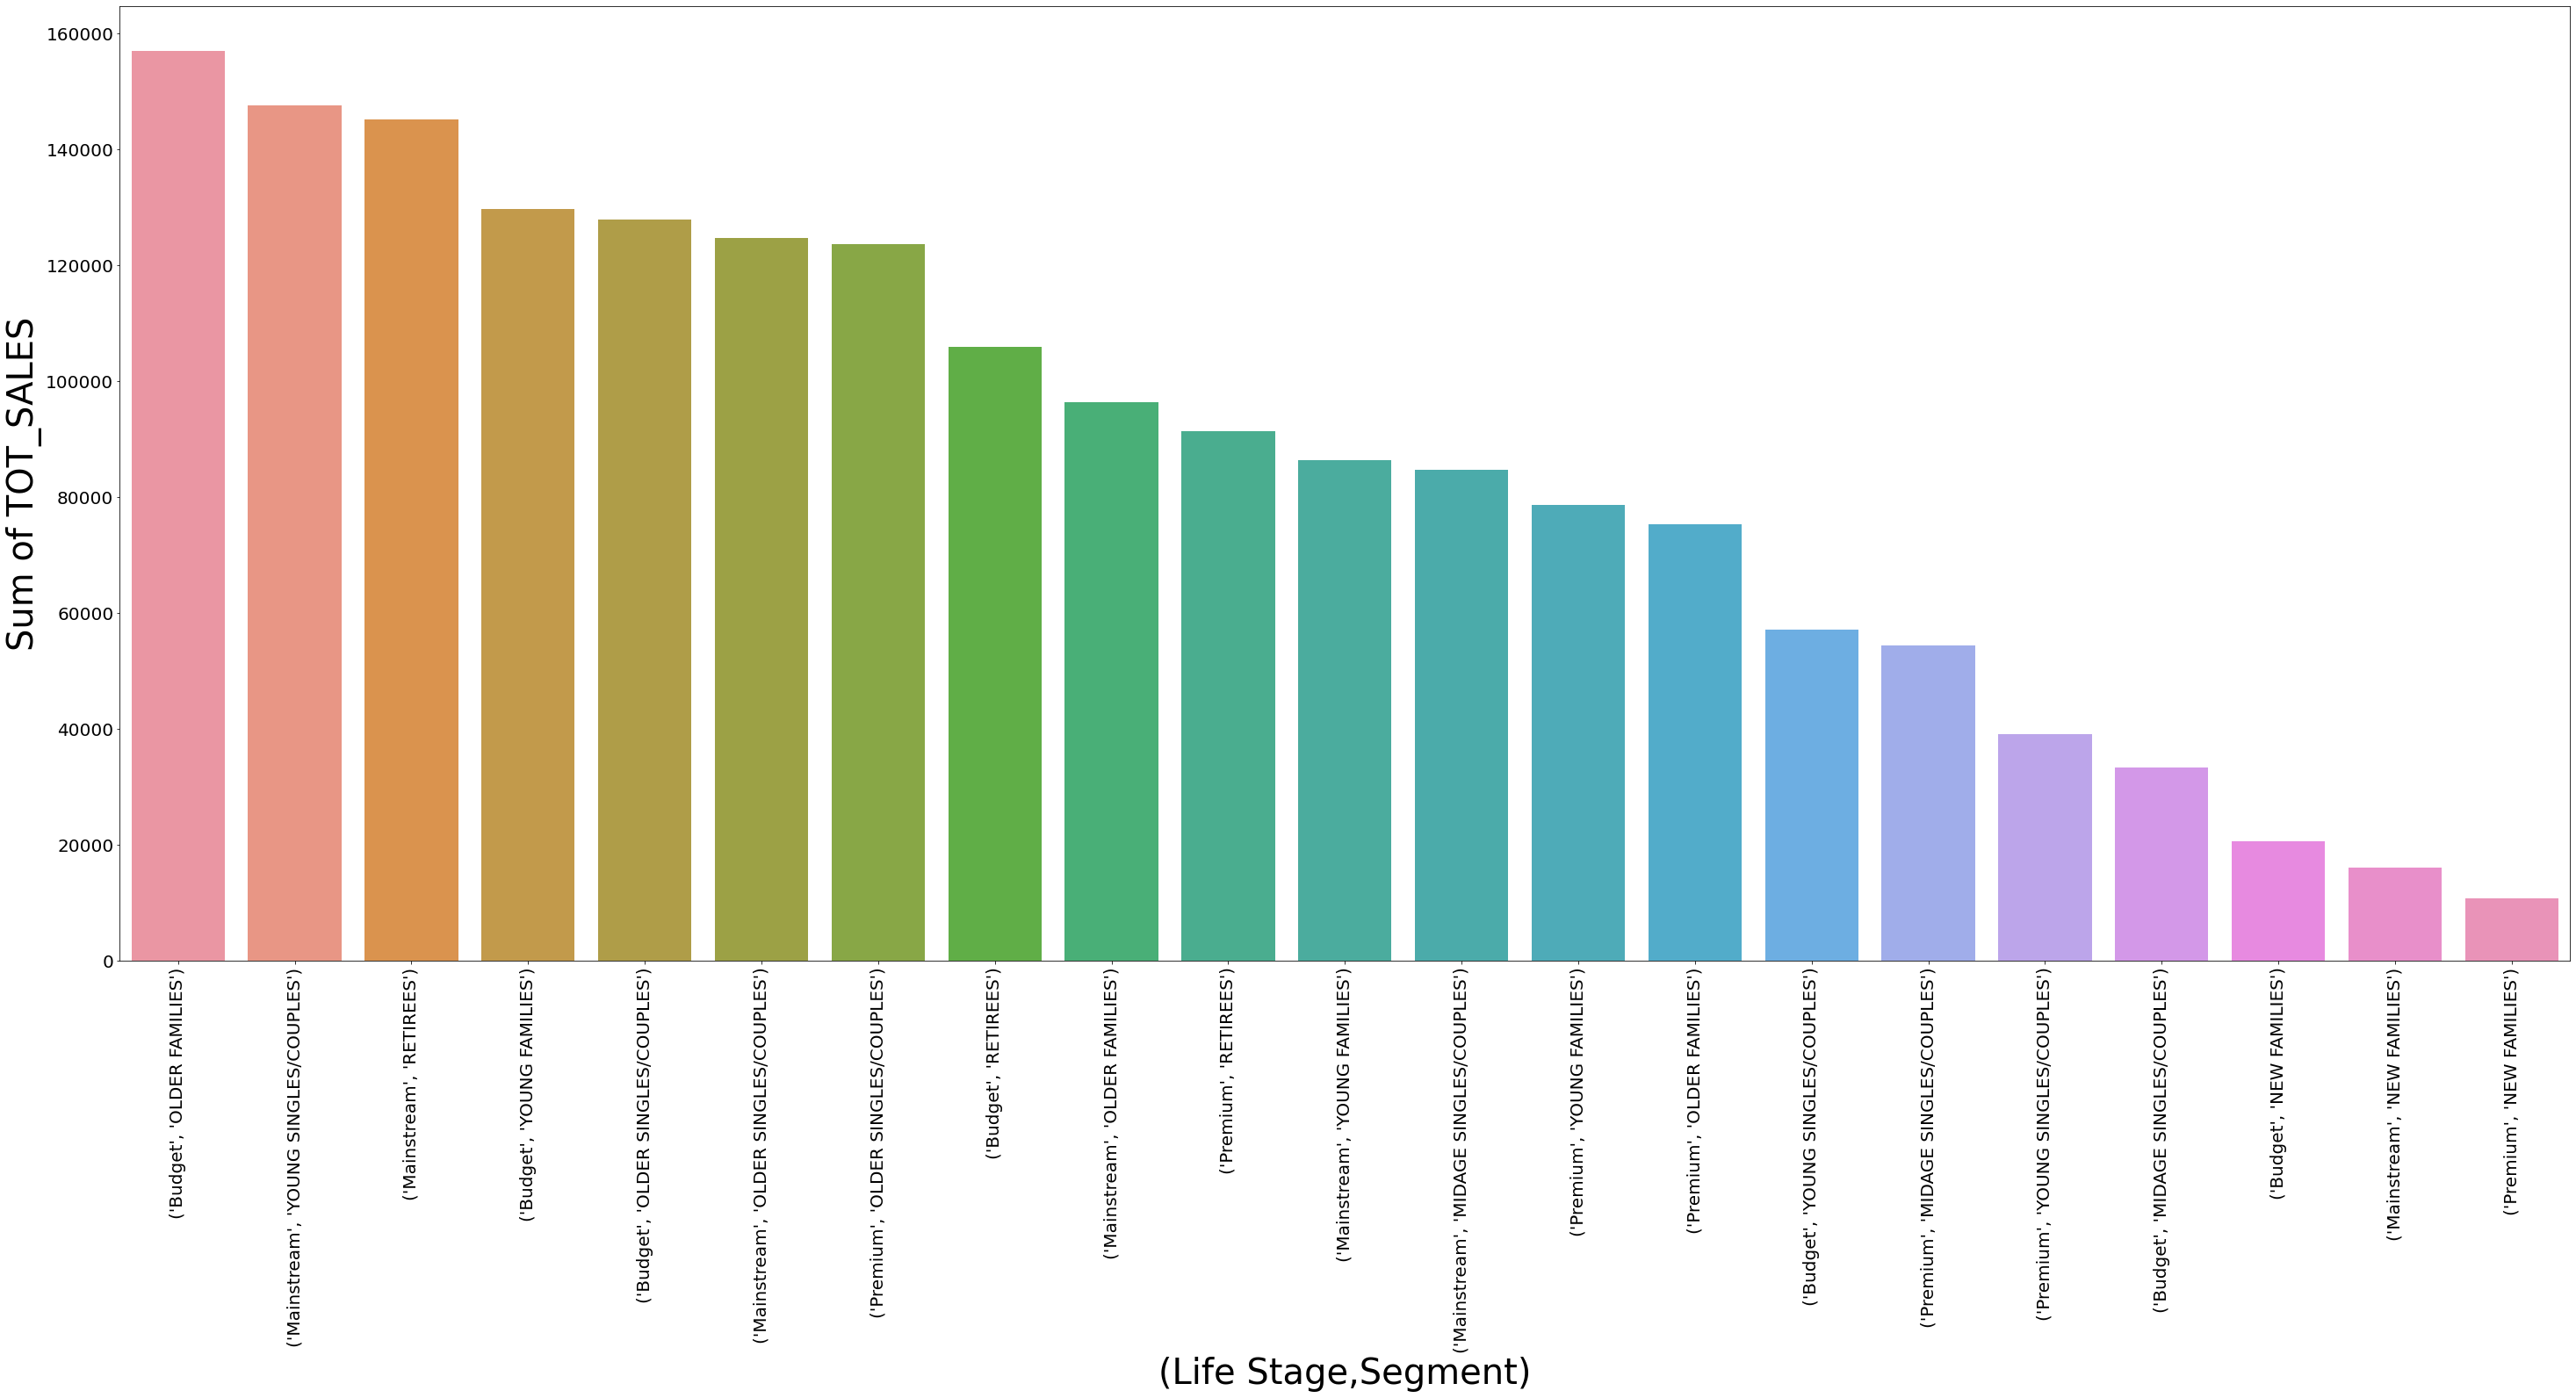

In [112]:
fig,ax=plt.subplots(figsize=(50,20))
sns.barplot(x=q1.index,y=q1["TOT_SALES"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("(Life Stage,Segment)",fontsize=40)
ax.set_ylabel("Sum of TOT_SALES",fontsize=40)

#### More sales are coming from....
#### 1. Budget-Older Families
#### 2. Mainstream-YOUNG SINGLES/COUPLES
#### 3. Mainstream-RETIREES
#### 4. Budget-YOUNG FAMILIES
Lets see if higher sales are due to there being more no.of customers in this segment who buy chips

#### How many customers are in each segment?

C:\Python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, 'Count')

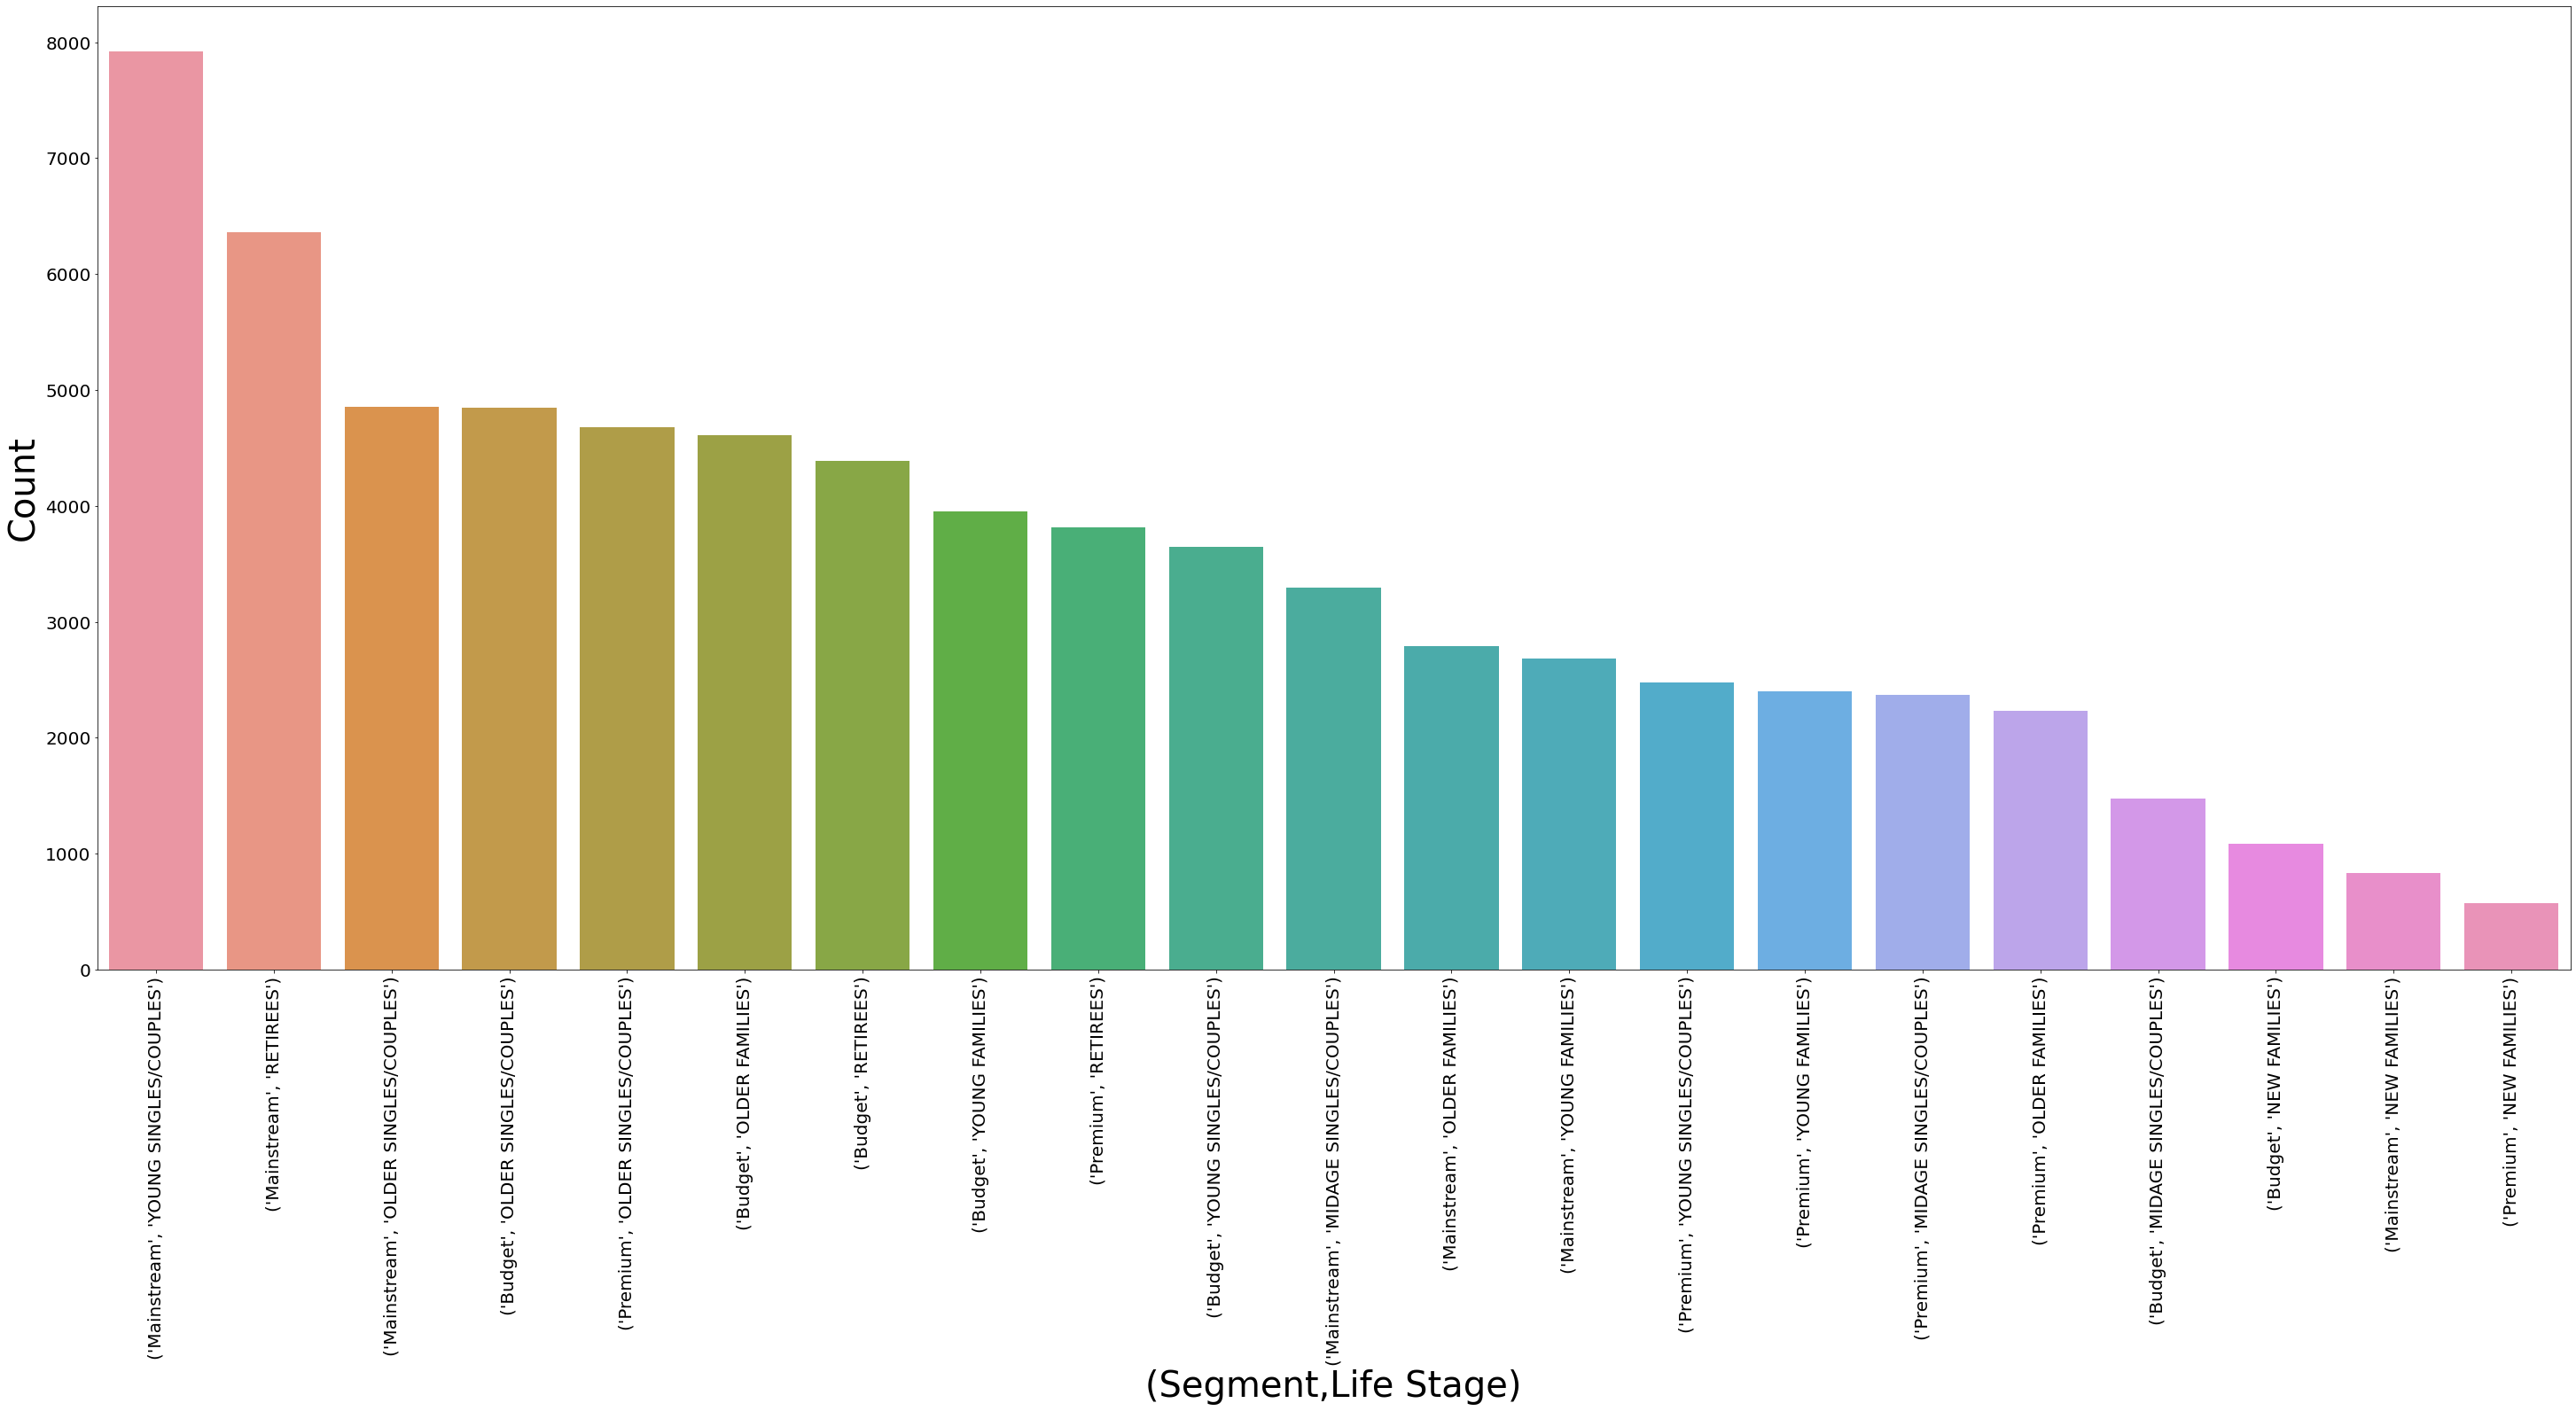

In [118]:
tempo=data.drop_duplicates(subset='LYLTY_CARD_NBR')
tempo['count']=1
comb2=tempo[["LIFESTAGE","PREMIUM_CUSTOMER","count"]].pivot_table(index=["PREMIUM_CUSTOMER","LIFESTAGE"],aggfunc=sum)
comb2.sort_values('count',ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(50,20))
sns.barplot(x=comb2.index,y=comb2["count"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("(Segment,Life Stage)",fontsize=40)
ax.set_ylabel("Count",fontsize=40)

#### Mainstream-YOUNG SINGLES/COUPLES
#### Mainstream-RETIREES
#### More of people belonging to these segments contribute to more sales in these customer segments....
#### But this metric isnt a major driver for the sales in the (BUDGET,OLDER FAMILIES) segment
Higher sales may also come from more quantity of chips being bought per customer. Lets have a look at it

#### Average no.of units (PROD_Quantity) per customers...

In [119]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pkg_size_grm,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,natural chip compny seasalt,2,6.0,175,natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,ccs nacho cheese,3,6.3,175,ccs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170,smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175,smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150,kettle,MIDAGE SINGLES/COUPLES,Budget


In [121]:
t1=data[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']].pivot_table(index=['PREMIUM_CUSTOMER','LIFESTAGE'],aggfunc=sum)
r=data.loc[:,['LIFESTAGE','PREMIUM_CUSTOMER']]

# use "comb2" dataframe that we created earlier
q3=pd.merge(t1,comb2,on=['PREMIUM_CUSTOMER','LIFESTAGE'],how='inner')
q3['Avg']=q3['PROD_QTY']/q3['count']
q3.sort_values('Avg',ascending=False,inplace=True)

Text(0, 0.5, 'Average')

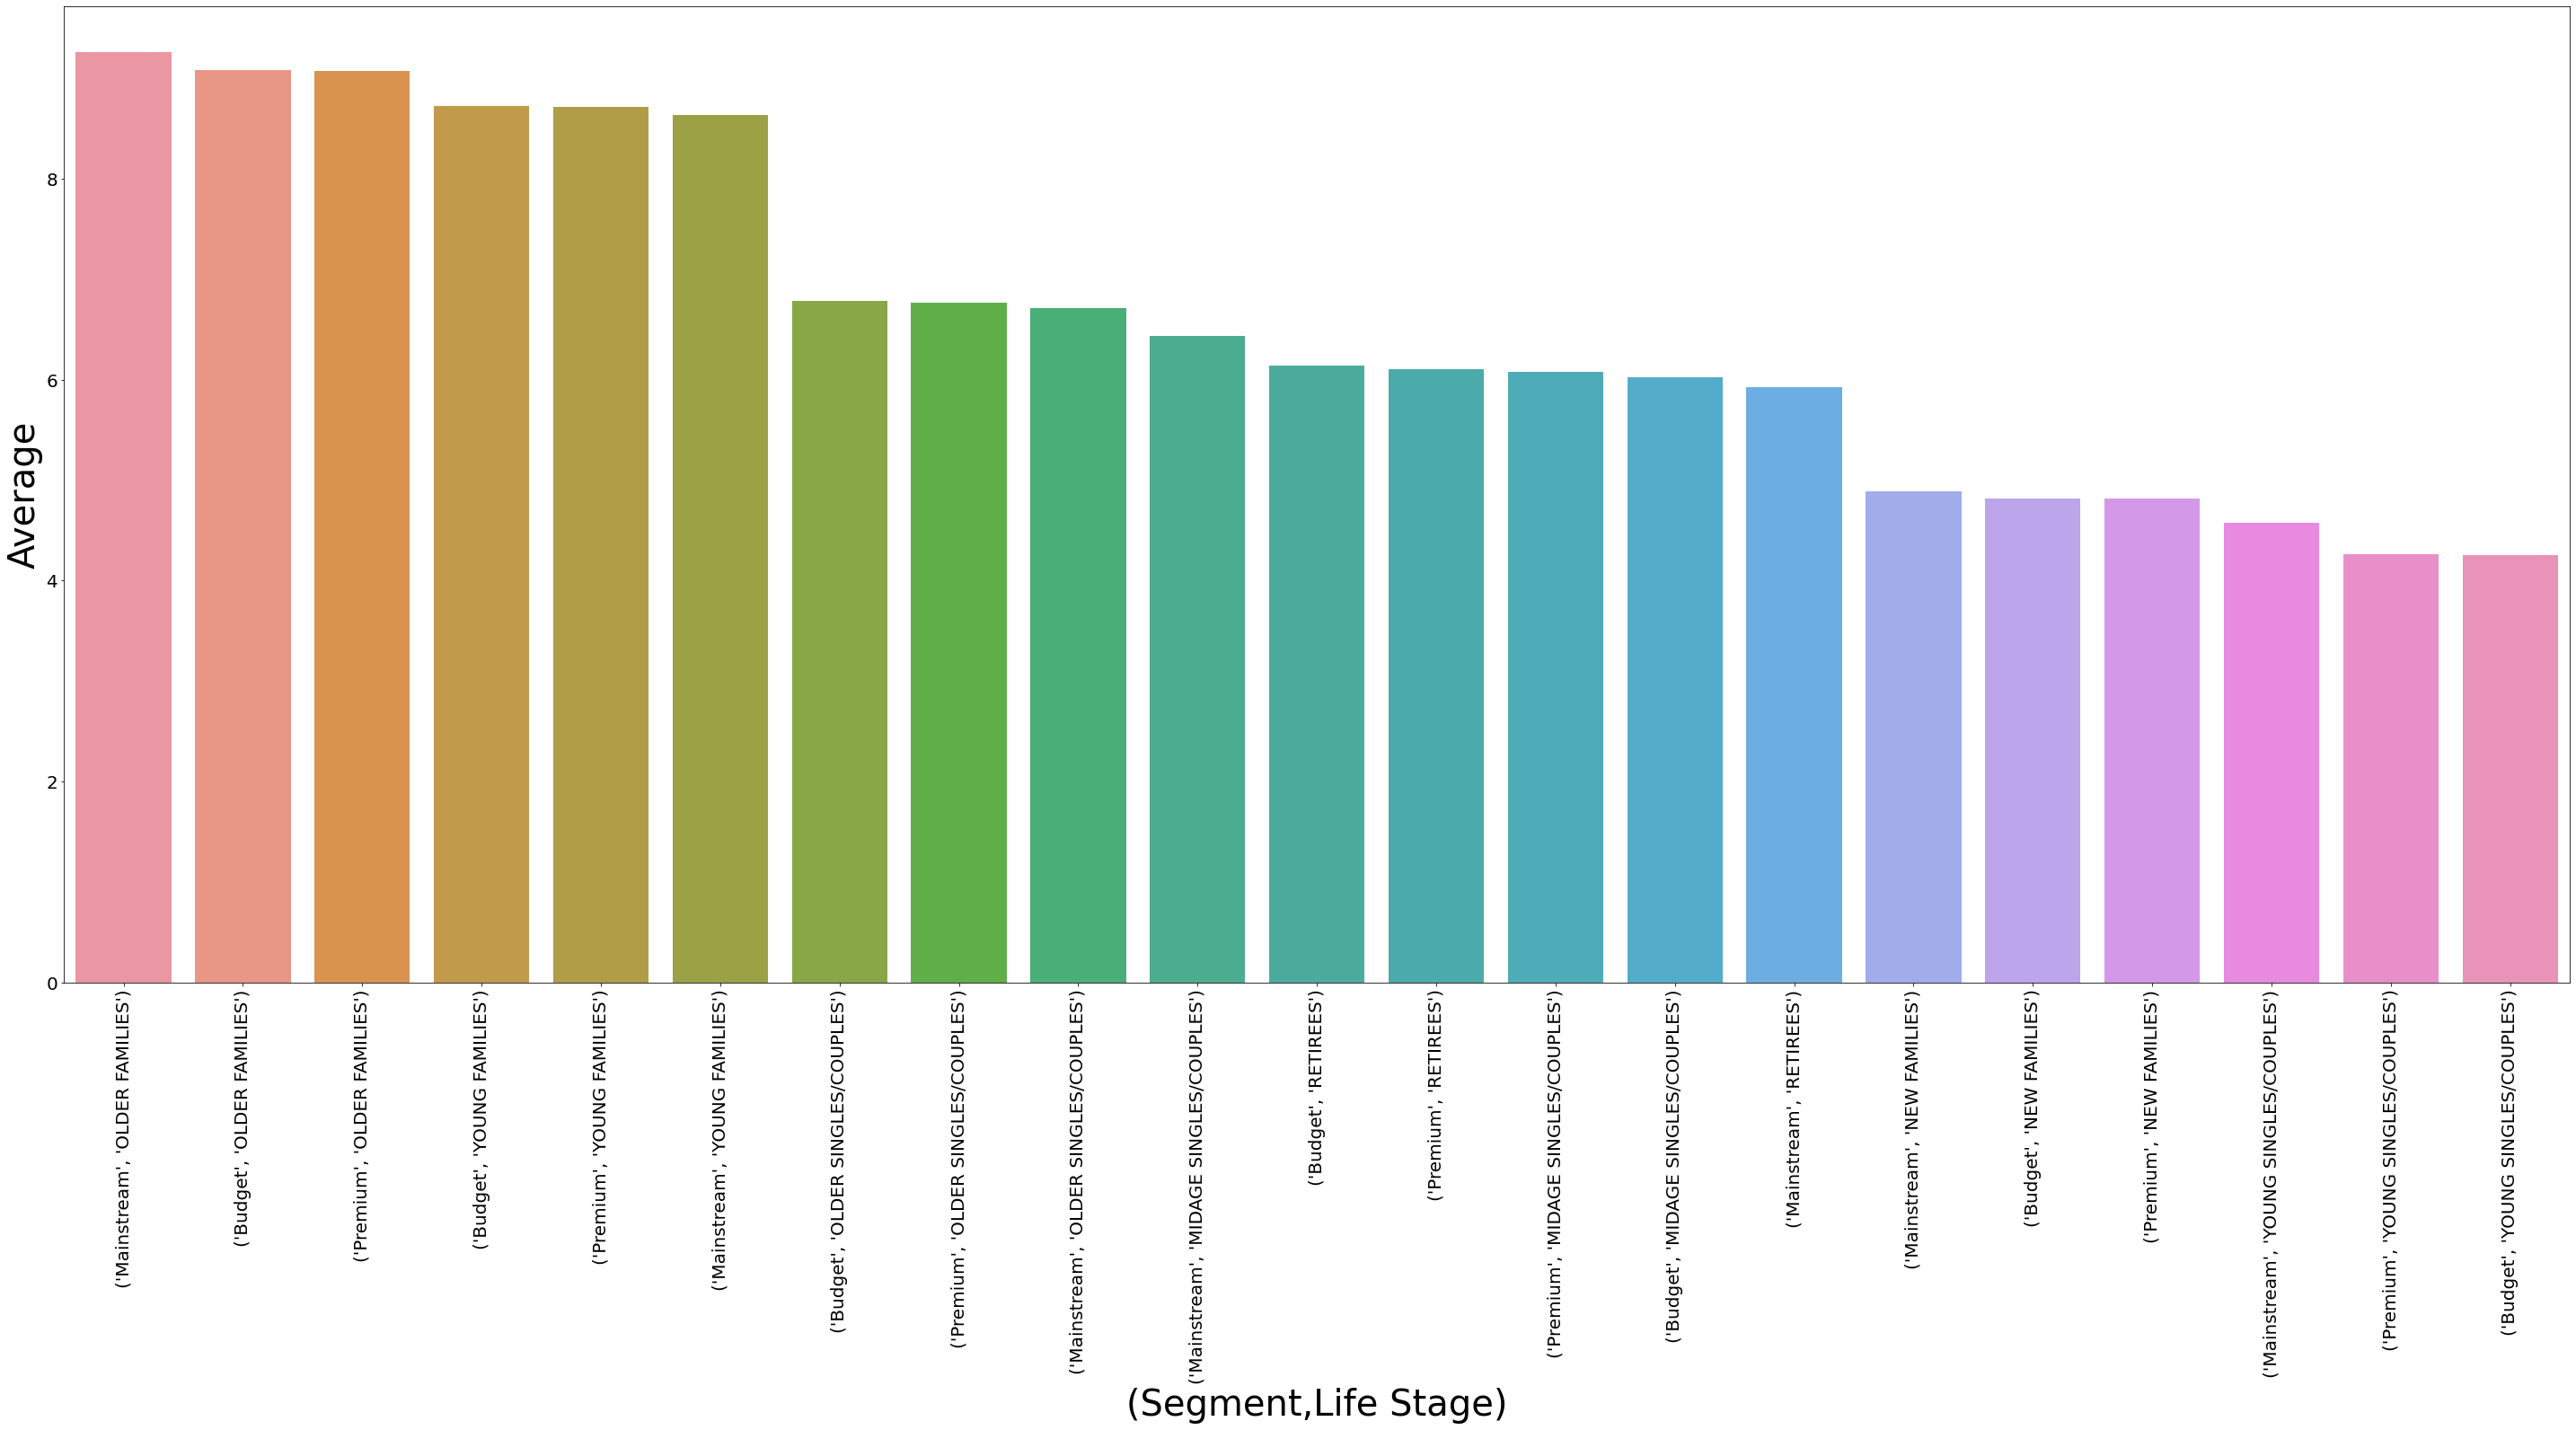

In [122]:
fig,ax=plt.subplots(figsize=(50,20))
sns.barplot(x=q3.index,y=q3["Avg"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("(Segment,Life Stage)",fontsize=40)
ax.set_ylabel("Average",fontsize=40)

#### Not only the avarage quantity of chips bought but also the average price influences the total sales per customer segments

#### Average sales (TOT_SALES) per customer....

Text(0, 0.5, 'Average Price per Unit')

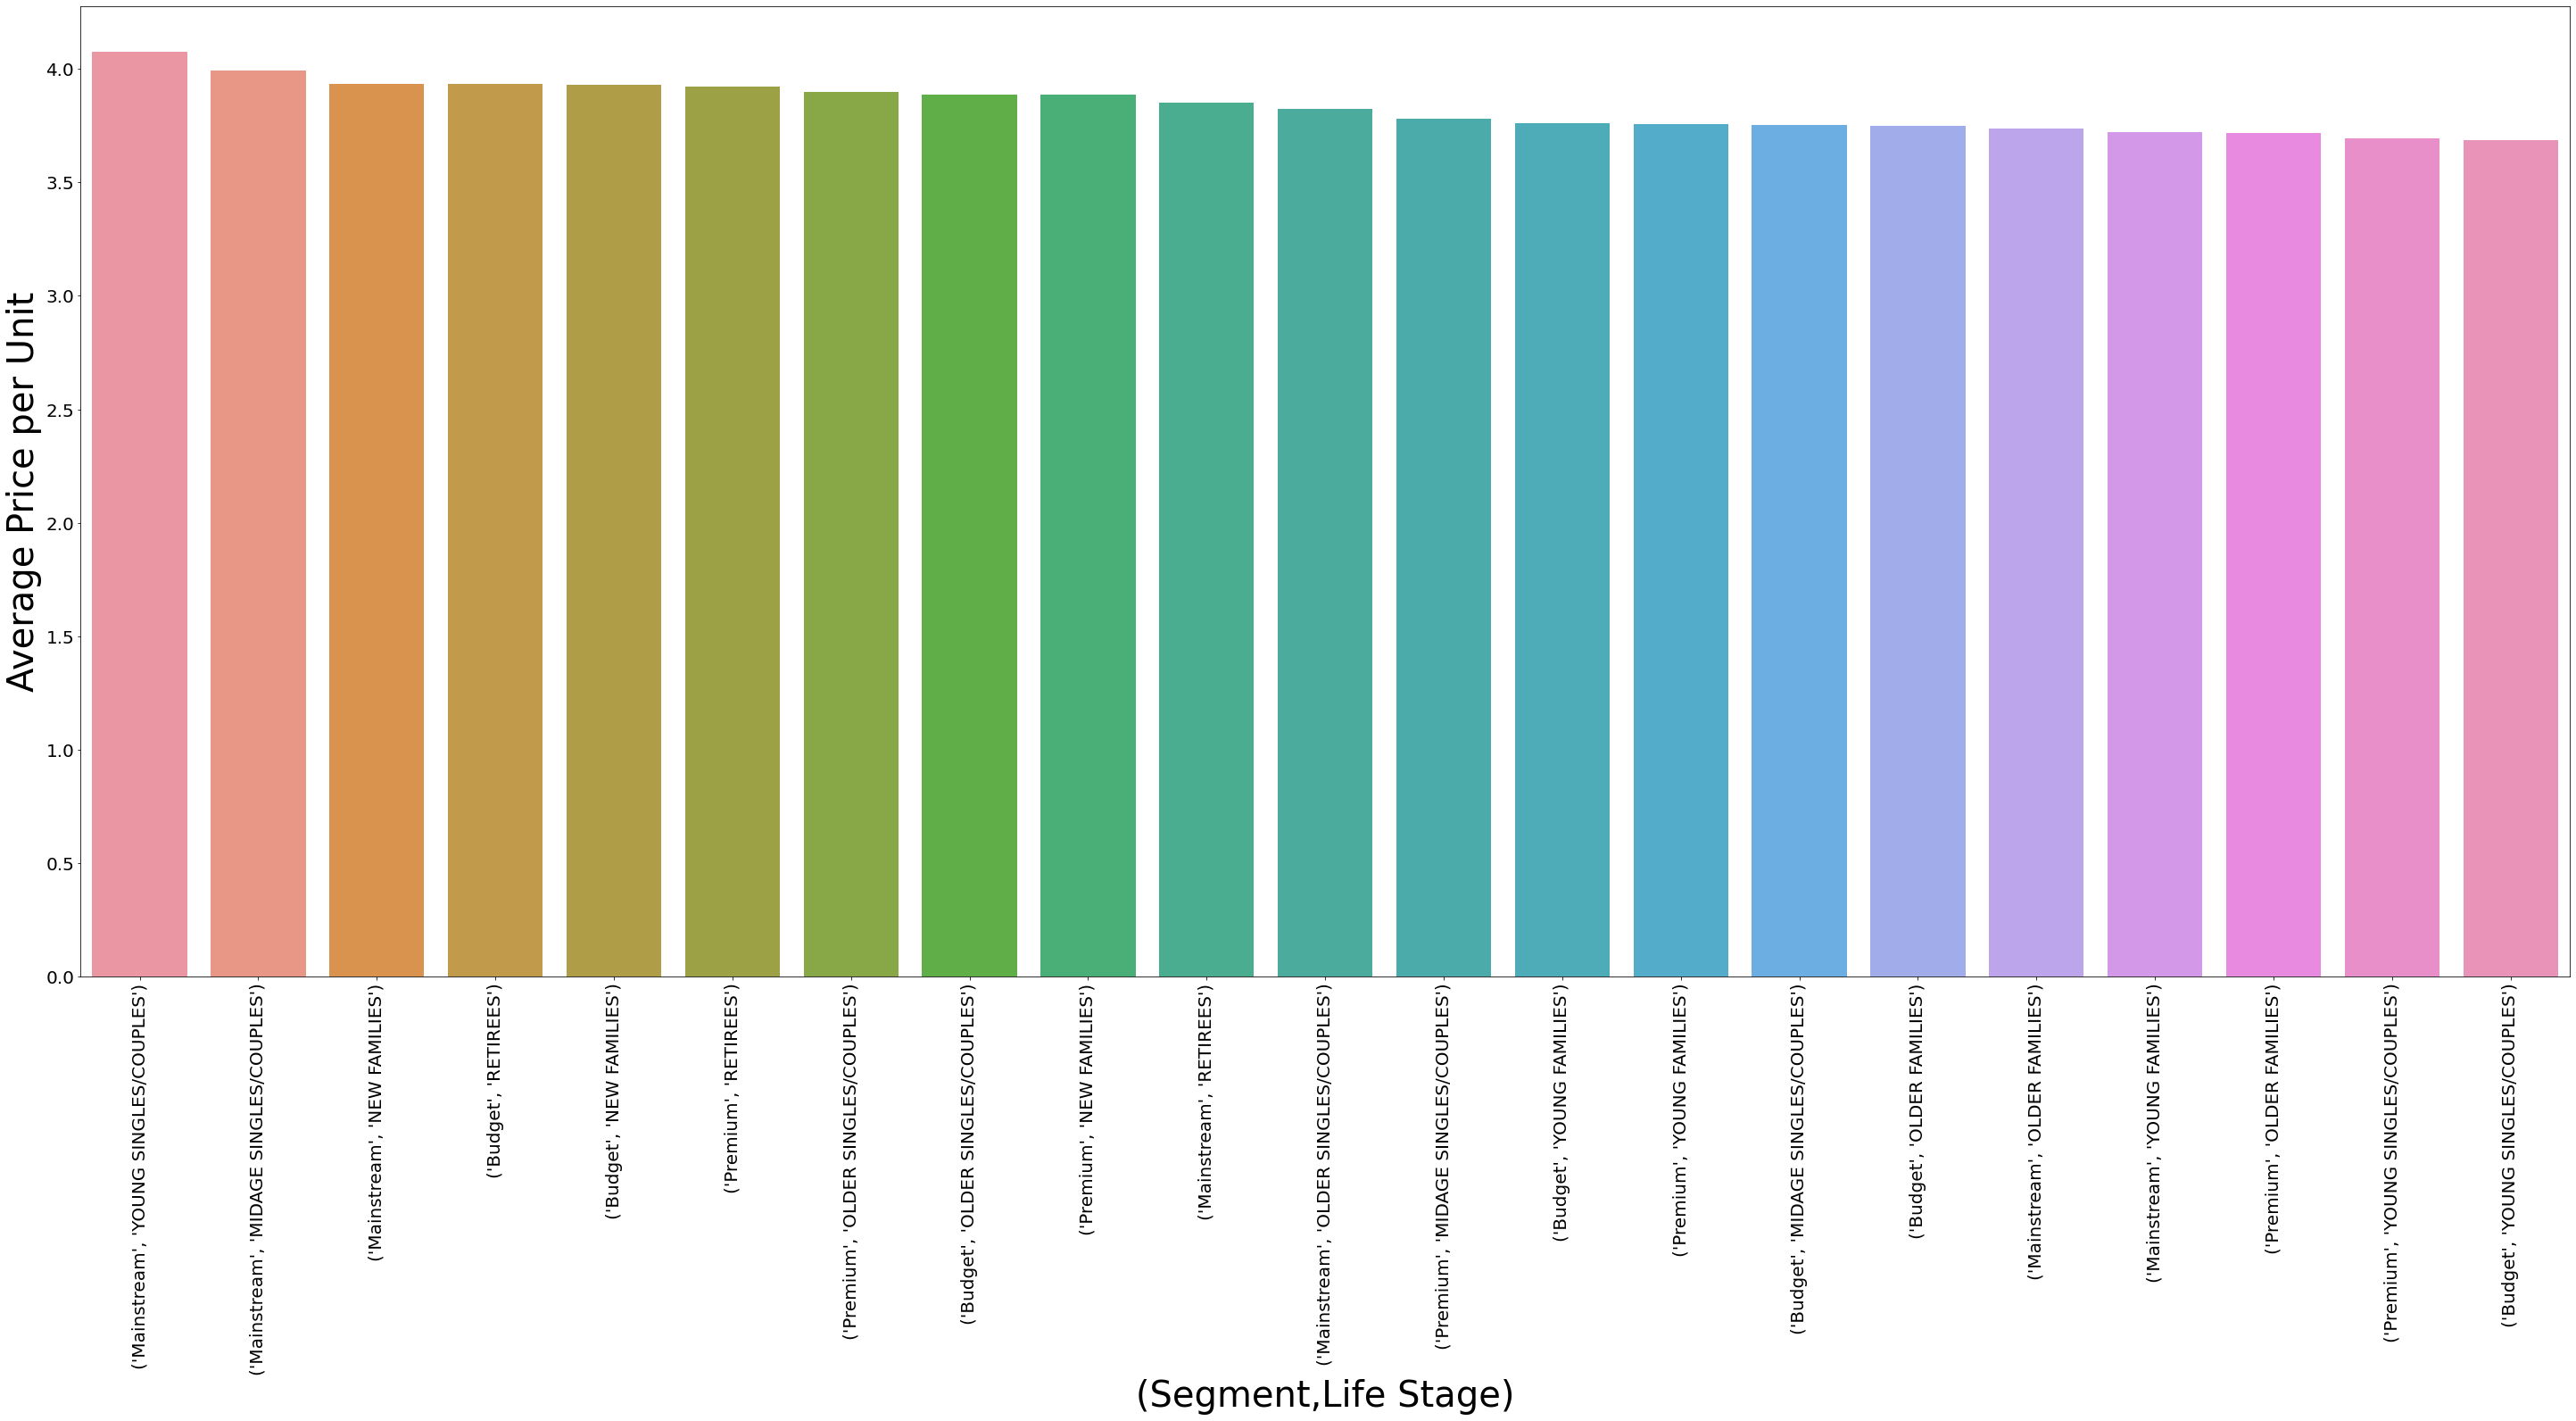

In [123]:
q4=pd.merge(q1,q3,on=['PREMIUM_CUSTOMER','LIFESTAGE'],how='inner')
q4.drop(columns=['count','Avg'],inplace=True)
q4['Avg_Price_per_unit']=q4['TOT_SALES']/q4['PROD_QTY']
q4.sort_values('Avg_Price_per_unit',ascending=False,inplace=True)

fig,ax=plt.subplots(figsize=(50,20))
sns.barplot(x=q4.index,y=q4["Avg_Price_per_unit"])
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
ax.set_xlabel("(Segment,Life Stage)",fontsize=40)
ax.set_ylabel("Average Price per Unit",fontsize=40)

#### Comparing Avg. spend value of Mainstream VS (Budget,Premium) MIDAGE Singles/Couples
#### Performing an Independent T-TEST

In [133]:
from scipy.stats import ttest_ind
Main_Mid_SC=data[(data['PREMIUM_CUSTOMER']=='Mainstream') & ((data['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') | (data['LIFESTAGE']=='YOUNG SINGLES/COUPLES' ))]
Not_Main_Mid_SC=data[(data['PREMIUM_CUSTOMER']!='Mainstream') & ((data['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') | (data['LIFESTAGE']=='YOUNG SINGLES/COUPLES'))]
Main_Mid_SC["Avg_Price"]=Main_Mid_SC['TOT_SALES']/Main_Mid_SC['PROD_QTY']
Not_Main_Mid_SC["Avg_Price"]=Not_Main_Mid_SC['TOT_SALES']/Not_Main_Mid_SC['PROD_QTY']

# Conducting the Independent t-test between the different groups
test=ttest_ind(Main_Mid_SC['Avg_Price'],Not_Main_Mid_SC['Avg_Price'])
print('*************')
print(test)
print('*************')

*************
Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)
*************


C:\Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#### The p-value is below the significance level!
#### So we can reject the Null Hypothesis and say that the Avg. Price per unit of Mainstream Midage and Young singles/couples is significantly higher than their Budget and Premium Counterparts!

## Deep dive into Mainstream, Young singles/couples
## Performing an Affinity/Apriori Analysis

In [134]:
data['Segment']=data['PREMIUM_CUSTOMER']+data['LIFESTAGE']

# For Brand of Chips and Size of Chips 
seg_brand=data[['Segment','BRAND']]
seg_brand

In [138]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
sb_array=np.array(seg_brand)
te_sb=te.fit(sb_array).transform(sb_array)
te_sb

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [139]:
sb_df=pd.DataFrame(te_sb,columns=te.columns_)
sb_df

,BudgetMIDAGE SINGLES/COUPLES,BudgetNEW FAMILIES,BudgetOLDER FAMILIES,BudgetOLDER SINGLES/COUPLES,BudgetRETIREES,BudgetYOUNG FAMILIES,BudgetYOUNG SINGLES/COUPLES,MainstreamMIDAGE SINGLES/COUPLES,MainstreamNEW FAMILIES,MainstreamOLDER FAMILIES,...,natural,pringles,red,smiths,sunbites,thins,tostitos,twisties,tyrrells,woolworths
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
246737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
246738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [141]:
frequent_brands=apriori(sb_df,min_support=0.01,use_colnames=True)
frequent_brands

,support,itemsets
0,0.019012,(BudgetMIDAGE SINGLES/COUPLES)
1,0.011445,(BudgetNEW FAMILIES)
2,0.087193,(BudgetOLDER FAMILIES)
3,0.069596,(BudgetOLDER SINGLES/COUPLES)
4,0.057652,(BudgetRETIREES)
5,0.071991,(BudgetYOUNG FAMILIES)
6,0.034745,(BudgetYOUNG SINGLES/COUPLES)
7,0.044966,(MainstreamMIDAGE SINGLES/COUPLES)
8,0.053664,(MainstreamOLDER FAMILIES)
9,0.069146,(MainstreamOLDER SINGLES/COUPLES)


So here the "Mainstream" segment customers prefer to buy the Brand "Kettle".
But the support value is really low but it gives us a freq of almost 15000.....is that a considerable amount to take into consideration?
So....

## Association Rule Mining for (Customer segment,Brand)

In [146]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_brands,metric='confidence',min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BudgetOLDER FAMILIES),(kettle),0.087193,0.167334,0.013455,0.154318,0.922216,-0.001135,0.984609
1,(kettle),(BudgetOLDER FAMILIES),0.167334,0.087193,0.013455,0.080411,0.922216,-0.001135,0.992625
2,(BudgetOLDER FAMILIES),(smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236
3,(smiths),(BudgetOLDER FAMILIES),0.123016,0.087193,0.011948,0.097124,1.113895,0.001222,1.010999
4,(BudgetOLDER SINGLES/COUPLES),(kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578
5,(kettle),(BudgetOLDER SINGLES/COUPLES),0.167334,0.069596,0.012422,0.074235,1.066658,0.000776,1.005011
6,(BudgetRETIREES),(kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196
7,(kettle),(BudgetRETIREES),0.167334,0.057652,0.010505,0.062779,1.088926,0.000858,1.005470
8,(BudgetYOUNG FAMILIES),(kettle),0.071991,0.167334,0.011117,0.154422,0.922837,-0.000930,0.984730
9,(kettle),(BudgetYOUNG FAMILIES),0.167334,0.071991,0.011117,0.066436,0.922837,-0.000930,0.994050


Mainstream-Young Singles/Couples =======> Kettle Gives us a Confidence of 0.19...
1. Which means that out of all the transactions which contain "Mainstream-Young Singles/Couples" segment customer....19% of the time a chip belonging to brand "Kettle" is purchased.

## Now for Packet size and Customer Segment

In [143]:
# For Customer Segment and Packet Size 
seg_size=data[['Segment','Pkg_size_grm']]
convert_dict = {'Segment': str,
                'Pkg_size_grm': str
               }
seg_size = seg_size.astype(convert_dict)

ss_array=np.array(seg_size)
te_ss=te.fit(ss_array).transform(ss_array)
te_ss

ss_df=pd.DataFrame(te_ss,columns=te.columns_)
ss_df

,110,125,134,135,150,160,165,170,175,180,...,MainstreamRETIREES,MainstreamYOUNG FAMILIES,MainstreamYOUNG SINGLES/COUPLES,PremiumMIDAGE SINGLES/COUPLES,PremiumNEW FAMILIES,PremiumOLDER FAMILIES,PremiumOLDER SINGLES/COUPLES,PremiumRETIREES,PremiumYOUNG FAMILIES,PremiumYOUNG SINGLES/COUPLES
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246735,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
246736,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
246737,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
246738,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [144]:
frequent_size=apriori(ss_df,min_support=0.01,use_colnames=True)
frequent_size

,support,itemsets
0,0.090731,(110)
1,0.101735,(134)
2,0.013200,(135)
3,0.162937,(150)
4,0.012037,(160)
5,0.061996,(165)
6,0.080988,(170)
7,0.269069,(175)
8,0.012138,(190)
9,0.018128,(200)


## Association Rule Mining for (Customer Segment,Packet Size)

In [148]:
rules_ss=association_rules(frequent_size,metric='confidence',min_threshold=0.01)
rules_ss

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BudgetOLDER FAMILIES),(150),0.087193,0.162937,0.014542,0.166775,1.023558,0.000335,1.004607
1,(150),(BudgetOLDER FAMILIES),0.162937,0.087193,0.014542,0.089247,1.023558,0.000335,1.002255
2,(BudgetOLDER SINGLES/COUPLES),(150),0.069596,0.162937,0.011393,0.163697,1.004665,0.000053,1.000909
3,(150),(BudgetOLDER SINGLES/COUPLES),0.162937,0.069596,0.011393,0.069920,1.004665,0.000053,1.000349
4,(BudgetYOUNG FAMILIES),(150),0.071991,0.162937,0.011599,0.161121,0.988859,-0.000131,0.997836
5,(150),(BudgetYOUNG FAMILIES),0.162937,0.071991,0.011599,0.071189,0.988859,-0.000131,0.999136
6,(MainstreamOLDER SINGLES/COUPLES),(150),0.069146,0.162937,0.011239,0.162534,0.997531,-0.000028,0.999520
7,(150),(MainstreamOLDER SINGLES/COUPLES),0.162937,0.069146,0.011239,0.068975,0.997531,-0.000028,0.999817
8,(MainstreamRETIREES),(150),0.080935,0.162937,0.013334,0.164747,1.011111,0.000147,1.002168
9,(150),(MainstreamRETIREES),0.162937,0.080935,0.013334,0.081835,1.011111,0.000147,1.000979


We have 2 rules here.....
1. Mainstream-Young Singles/Couples========>150 with Support = 0.012483,Confidence=0.157593,Lift=0.967205. Which means that out of all the Transactions involving Mainstream-Young Singles/Couples...15% of the time they choose a chips packet of size 150g
2. Mainstream-Young Singles/Couples ========> 175 with Support=0.020252,Confidence=0.255679,Lift=0.950239. Which means that oout of all the Transactions involving Mainstream-Young Singles/Couples...25% of the time they choose a chips packet of size 175g.
the 175 has greater overall support and confidence but....150 has slightly Lift.